# Topic 3 Laboratory

In this activity you will have the opportunity to understand better how to import and manipulate images in Python.

## Installing the necessary packages

To work with images in Python, we will use packages such as `numpy`, `OpenCV` and `matplotlib`.

Execute the code in the following cell to install these packages using the `pip` command:

In [1]:
!pip install opencv-python
!pip install matplotlib

Notice that we did not install numpy due to the following reasons:

* We installed it last week during class(and there is no need to install it again)

* Sometimes packages include sub-packages. Such is the case of the three previous ones, which already contain numpy

## Importing the modules

Now we will import the packages, functions and classes we will use for this activity:

* The first one is `OpenCV`, which is refered to as `cv2`:

In [2]:
import cv2

* To handle and perform operations on the images, we need `numpy`, which can be imported by executing the command we saw in class:

In [3]:
import numpy as np

* To plot the images, we will use `matplotlib.pyplot` assigning the pseudonym `plt` for short

In [4]:
import matplotlib.pyplot as plt

## Working with grayscale images

### Importing the image

First, go to moodle and from the section containing the material for this week download image `logo.png`.

![logo](https://www.dropbox.com/s/ee0hclyf62n4kql/logo.png?raw=1)

You need to upload `logo.png` to this notebook, either by dragging and dropping the file in the "Files" section (fifth icon on the left hand side) or by running the following cell:

In [6]:
from google.colab import files
uploaded = files.upload()

Saving logo.png to logo.png


To import the Python logo as a `numpy array` into a variable called `img`, we will use the `imread`command from `OpenCV`.

You can find the full documentation of the command [here](https://docs.opencv.org/4.2.0/d4/da8/group__imgcodecs.html), but I strongly recommend you to check the [OpenCV Python Tutorials](https://opencv24-python-tutorials.readthedocs.io/en/latest/) whenever you have a doubt of any command, as they are more suitable and easier to understand that the `OpenCV` original documentation which is designed for C.

In [7]:
## Importing the logo as a grayscale image
img = cv2.imread("/content/logo.png",0)

Notice that the `imread` function has two parameters: the **image file** to load and a **flag** (0/1) which indicates if we need to load the image as grayscale/colour respectively.

Check the type and shape of the image to verify that you have a `numpy` array of size $75 \times 75$

In [8]:
type(img)

numpy.ndarray

In [9]:
img.shape

(75, 75)

What would happen if we print `img`? Are we able to see it? Run the following cell to find out!

In [10]:
print(img)

[[234 246 246 ... 246 246 234]
 [243 255 255 ... 255 255 242]
 [243 255 255 ... 255 255 242]
 ...
 [243 255 255 ... 255 255 242]
 [243 255 255 ... 255 255 242]
 [234 246 246 ... 246 246 234]]


Notice that we only see a bunch of numbers in an array. This is because when printing the variable, Python automatically assumes that we want to visualise the values of the pixels and not the image itself.

To show the actual image, we can use the `plt.imshow` function (from the `matplotlib.pyplot` library).

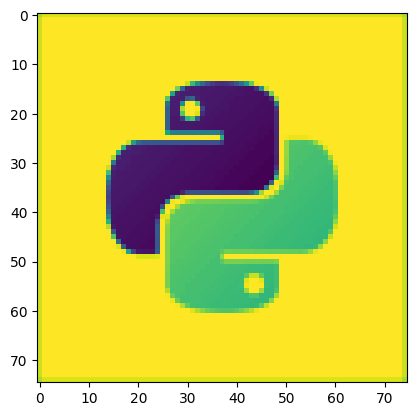

In [11]:
plt.imshow(img)

However, the image does not appear in grayscale as `plt` attempts to use colours to show you the image with a better contrast.

To avoid the yellow background, you can use the following setting:

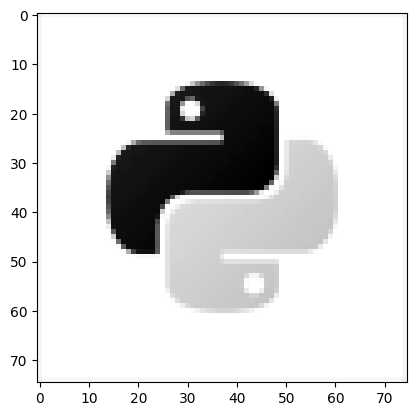

In [12]:
plt.imshow(img, cmap='Greys_r')

### Locating the value of pixels

Notice that the image is shown with a coordinate plane which gives us an idea of the positions of the pixels within the logo.

Given that this is a $75 \times 75$ image, we can access different positions of the image to see their value.

For instance, to see the value of the **left-top** pixel, we can use the following command (The first zero corresponds to the y-axis/rows and the second zero corresponds to the x-axis/column):

In [13]:
print(img[0,0])

234


We can use the same command to see different positions of the image.

For instance, you can see the value of the other corners or some values from the two pythons.

In [19]:
## Use this cell to print the values of different pixels
print(img[0,73])


246


In [22]:
## Use this cell to print the values of different pixels
print(img[0,74])

234


Take note of the approximate values corresponding to the two pythons. We will use this information later!

### Changing the value of pixels

We can change the top-left pixel of the img in `img` to black by issuing the following code:

[[  0 246 246 ... 246 246 234]
 [243 255 255 ... 255 255 242]
 [243 255 255 ... 255 255 242]
 ...
 [243 255 255 ... 255 255 242]
 [243 255 255 ... 255 255 242]
 [234 246 246 ... 246 246 234]]


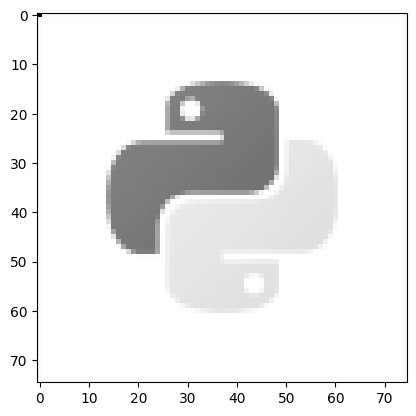

In [18]:
img[0,0]=0
print(img)
plt.imshow(img, cmap='Greys_r')

### Trimming the image

We can also slice the image and create a new, smaller one.

For instance, say that you want to produce a new image only with the face of the "top" Python.

![facetop](https://www.dropbox.com/s/l9jgy6kean9e733/logobin_facetopmarked.png?raw=1)

By inspecting the image axis, we could mark our trim by starting from the **row 15** to the **row 26**, and then from the **column 24** to the **column 39**.

Now, we can use the following code to produce a trimmed image called `img_trimtop` with the face of the top python.

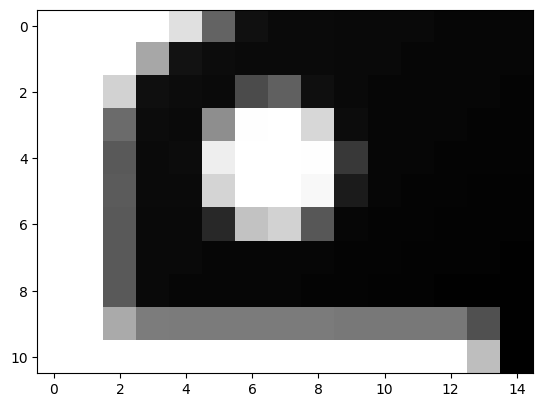

In [20]:
img_trimtop = img[15:26,24:39] # rows go first, columns go after
plt.imshow(img_trimtop, cmap='Greys_r')

Now it's your turn to create a trimmed image called `img_trimbottom` with the face of the bottom python.

In [21]:
## Use this cell to create img_trimbottom


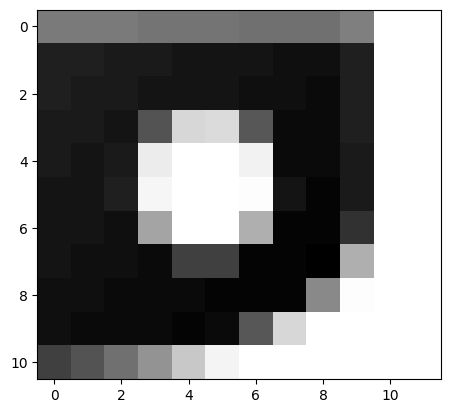

In [33]:
img_trimtop = img[50:61,39:51] # rows go first, columns go after
plt.imshow(img_trimtop, cmap='Greys_r')

The resulting image should look like this:
![facebottom](https://www.dropbox.com/s/87ka01xgeebi2ge/facebottom.png?raw=1)

*   List item
*   List item



1.   List item
2.   List item



1.   List item
2.   List item



### Inverting the image

You can also create the *negative* of an image by doing the following:

In [ ]:
img_neg = 255 - img
print(img_neg)
plt.imshow(img_neg, cmap='Greys_r')

By subtracting $255$ minus the original image, what we are doing is converting all values into their opposite ones (in the gray scale).

### Transposing the image

As seen in the previous lab, there is a mathematical operation called **transpose** which lets you exchange the columns and the rows of a matrix. This function is also included in the numpy module, and it can be applied to image arrays as well:

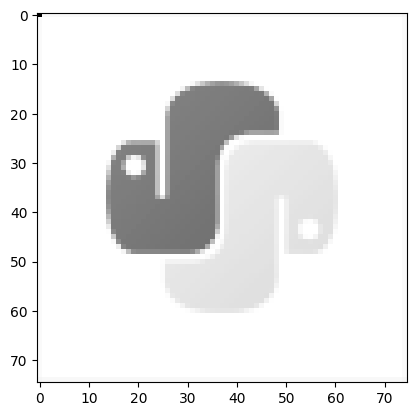

In [34]:
img_trans = img.transpose()
plt.imshow(img_trans, cmap='Greys_r')

Notice that **it seems** that the new image is turned 90 degrees counter-clockwise and has also been flipped horizontally.

Although in reality, what has happened is that pixels have changed positions, so for instance, the pixel that was in row 3, column 7, now is in row 7, column 3.

### Resizing the image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

`OpenCV`also contains a pre-defined function to resize the image by indicating the new width/height.

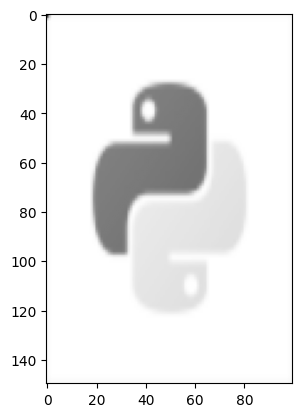

In [35]:
img_resize = cv2.resize(img, (100, 150))
plt.imshow(img_resize, cmap='Greys_r')

Try different values in the tuple (second parameter of the function) to see different results.

### Normalising the image

To convert the image from standard to normalised grayscale, we simply need to divide the `numpy`array by 255 as follows

[[0.         0.96470588 0.96470588 ... 0.96470588 0.96470588 0.91764706]
 [0.95294118 1.         1.         ... 1.         1.         0.94901961]
 [0.95294118 1.         1.         ... 1.         1.         0.94901961]
 ...
 [0.95294118 1.         1.         ... 1.         1.         0.94901961]
 [0.95294118 1.         1.         ... 1.         1.         0.94901961]
 [0.91764706 0.96470588 0.96470588 ... 0.96470588 0.96470588 0.91764706]]


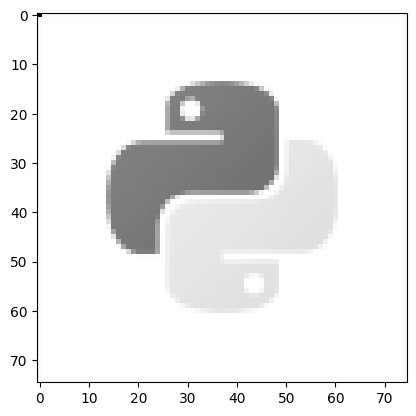

In [36]:
img_norm = img/255
print(img_norm)
plt.imshow(img_norm, cmap='Greys_r')

Notice that nothing has changed visually, just the values!

### Saving the image

You can save any of the images produced in this tutorial by using either the `cv2.imwrite` or the `plt.imsave` command.

For instance, to save the transpose image, use the following command:

In [37]:
cv2.imwrite('logotrans_cv.png',img_trans)

True

or

In [38]:
plt.imsave('logotrans_plt.png',img_trans)

I recommend to use `cv2.imwrite`, given that the `plt` option will save it with the yellow background by default.

## In case you are curious, how does the image look in colour?

[[[234 234 234]
  [246 246 246]
  [246 246 246]
  ...
  [246 246 246]
  [246 246 246]
  [234 234 234]]

 [[243 243 243]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [242 242 242]]

 [[243 243 243]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [242 242 242]]

 ...

 [[243 243 243]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [242 242 242]]

 [[243 243 243]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [242 242 242]]

 [[234 234 234]
  [246 246 246]
  [246 246 246]
  ...
  [246 246 246]
  [246 246 246]
  [234 234 234]]]
(75, 75, 3)


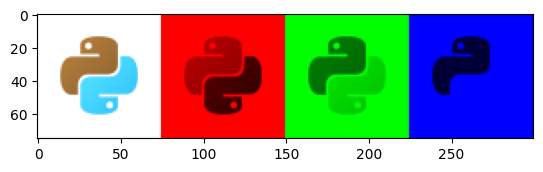

In [39]:
## Load the image with the flag in 1 (colour mode)
img_color = cv2.imread("logo.png",1)
## Print the image (you will see many matrices as there are multiple dimensions)
print(img_color)
## Print the shape (notice now it has 3 dimensions)
print(img_color.shape)
## Create three copies of the image
img_R = img_color.copy()
img_G = img_color.copy()
img_B = img_color.copy()
## In each copy, only access the values of interest
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
## Concatenate the original image to the three chanels
img_RGB = np.concatenate((img_color, img_R, img_G, img_B), axis=1)
## Show the images
plt.imshow(img_RGB)